In [1]:
from data_builder import *
from models import *
from utils import *
from tensorboardX import SummaryWriter
import argparse
import pickle
import pandas as pd
import tensorflow as tf
from utils import get_hamiltonian
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/shaan/anaconda3/envs/main/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# noise_vec = [True]
# datasets = ['three_body']
# dimz = [6]
# root_dir = 'small_expt_21_april'

# state_error = np.zeros((2,6,25))
# energy_error = np.zeros((2,6,25))

# for dex_data,dataset_name in enumerate(datasets):
#     hamiltonian_fn = get_hamiltonian(dataset_name)
#     for noisy in noise_vec:
#         if noisy:
#             with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
#                 file = pickle.load(output_file)
#         else:
#             with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
#                 file = pickle.load(output_file)
#         lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
#         fig,axs = plt.subplots(1,4,figsize=(20,5))
#         ax = axs.ravel()
#         #ax = axs.ravel()
#         for TEST_POINT in range(25):
#             for dex in range(len(lab_list)):
#                 for integ_index,integ_type in enumerate(['rk4','vi4']):
#                     true_batch_tmp = file[f'gt_{TEST_POINT}']
#                     qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
#                     ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
#                     true_batch = np.concatenate([qs,ps],1)

#                     if 'g' not in lab_list[dex]:
#                         yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
#                         K_pred,U_pred = hamiltonian_fn(yhat,'classic')
#                     else:
#                         yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
#                         qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
#                         ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
#                         yhat = np.concatenate([qs,ps],1)
#                         K_pred,U_pred = hamiltonian_fn(yhat,'classic')

#                     K_true,U_true = hamiltonian_fn(true_batch,'classic')

#                     ham_pred = K_pred + U_pred
#                     ham_true = K_true + U_true
#                     yhat = yhat[:int(yhat.shape[0]/2)]
#                     true_batch = true_batch[:int(true_batch.shape[0]/2)]
#                     ham_pred = ham_pred[:int(ham_pred.shape[0]/2)]
#                     ham_true = ham_true[:int(ham_true.shape[0]/2)]
#                     state_mse = ((yhat-true_batch)**2).mean()
#                     energy_mse = ((ham_pred-ham_true)**2).mean()
#                     print(state_mse,energy_mse)
#                     state_error[integ_index,dex,TEST_POINT] = state_mse
#                     energy_error[integ_index,dex,TEST_POINT] = energy_mse


In [3]:
# labels = ['dn','hnn','pnn','dgn','hgn','pgn']
# plt.figure()
# plt.xscale('log')
# for i in range(6):
#     plt.hist(state_error[1,i,:],alpha=0.9,label=labels[i])
# plt.legend()

In [4]:
# from scipy.stats import gmean


# fig,ax = plt.subplots(2,1,sharex=True,figsize=(7,7))
# xvals = np.arange(6)
# wdt = 0.45
# label_list = ['DN','HNN','PNN','DGN','HOGN','PGN']
# labels = ['MASS SPRING','PENDULUM','2-BODY GRAVITATIONAL','3-BODY GRAVITATIONAL','5 SPRING PARTICLE','HEINON HEILES']

# fig.suptitle('3-BODY GRAVITATIONAL')
# ax[0].set_title('State MSE')
# ax[1].set_title('Energy MSE')
# ax[0].bar(xvals-0.23,gmean(state_error[0,:,:],1),width=wdt,label='rk4',color='royalblue')
# ax[0].bar(xvals+0.23,gmean(state_error[1,:,:],1),width=wdt,label='vi4',color='darkorange')
# ax[1].bar(xvals-0.23,gmean(energy_error[0,:,:],1),width=wdt,label='rk4',color='royalblue')
# ax[1].bar(xvals+0.23,gmean(energy_error[1,:,:],1),width=wdt,label='vi4',color='darkorange')
# ax[1].set_xticks(xvals)
# ax[1].set_xticklabels(label_list)
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')
# plt.savefig(f'three_body_geom_{noisy}.pdf',bbox_inches='tight')



In [2]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=3, rc={'lines.linewidth':3})
sns.set_palette('deep')


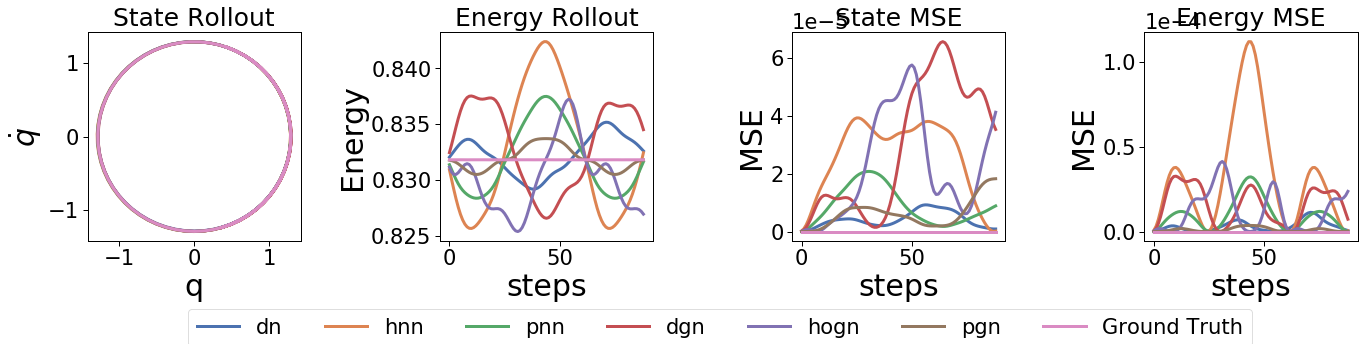

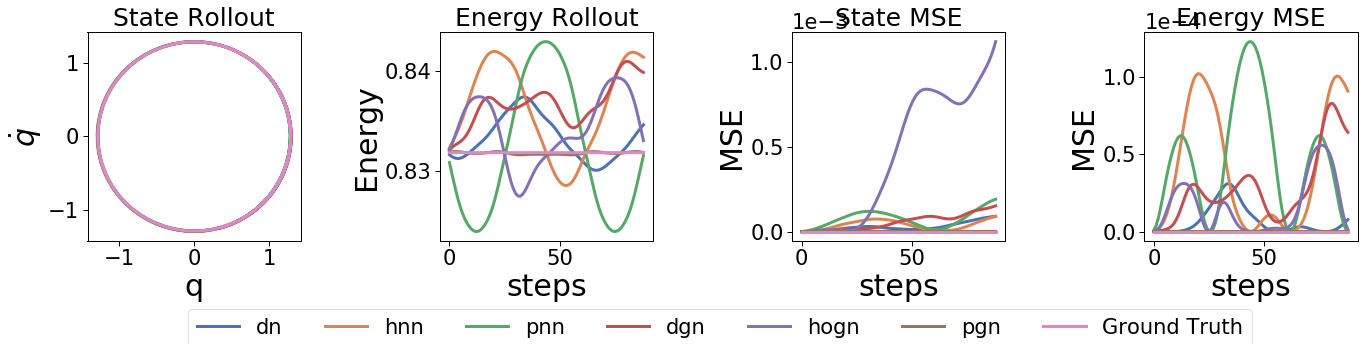

In [18]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=2.4, rc={"font.size":30,"axes.titlesize":25,"axes.labelsize":30,'lines.linewidth':3})
sns.set_palette('deep')
 
datasets = ['mass_spring']
dimz = [1]

noise_vec = [False]
root_dir = 'small_expt_21_april/'

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
            fig,axs = plt.subplots(1,4,figsize=(20,5))
            ax = axs.ravel()
            #ax = axs.ravel()
            TEST_POINT = 0
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

                ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,1],label=lab_list[dex],sort=False,ax=ax[0],legend=False)
                #ax[0].scatter(input_batch[:,0],input_batch[:,1])
                ax[0].set_xlabel('q')
                ax[0].set_ylabel(r'$\dot{q}$')


                ax[1].set_title('Energy Rollout')
                sns.lineplot(x=range(len(ham_pred)),y=ham_pred,label=lab_list[dex],ax=ax[1],legend=False)
                ax[1].set_xlabel('steps')
                ax[1].set_ylabel('Energy')



                ax[2].set_title('State MSE')
                l1 =sns.lineplot(x=range(len(yhat)),y=((yhat-true_batch)**2).mean(1),label=lab_list[dex],ax=ax[2],legend=False)
                ax[2].set_xlabel('steps')
                ax[2].set_ylabel('MSE')

                ax[3].set_title('Energy MSE')
                l2 =sns.lineplot(x=range(len(yhat)),y=(ham_pred-ham_true)**2,label=lab_list[dex],ax=ax[3],legend=False)
                ax[3].set_xlabel('steps')
                ax[3].set_ylabel('MSE')

            sns.lineplot(x=true_batch[:,0],y=true_batch[:,1],markers='x',label='Ground Truth',ax=ax[0],sort=False,legend=False)
            sns.lineplot(x=range(len(ham_pred)),y=ham_true,label='Ground Truth',ax=ax[1],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[2],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[3],legend=False)
            ax[2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
            ax[3].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #         ax[2].set_yscale('log')
    #         ax[3].set_yscale('log')

            handles, labels = ax[3].get_legend_handles_labels()
            fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.035),fancybox=True,ncol=7)
            #plt.legend(loc='best')
            plt.tight_layout()
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card.pdf',dpi=2400,bbox_inches='tight')


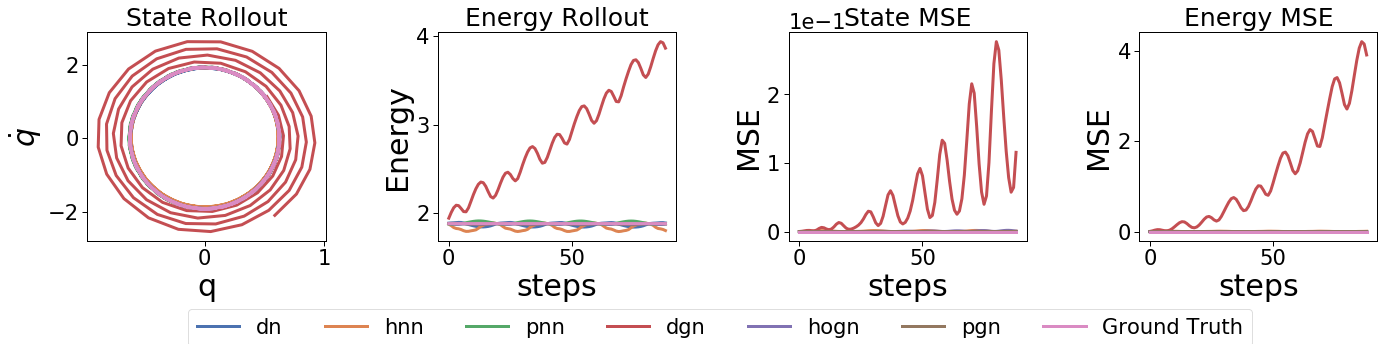

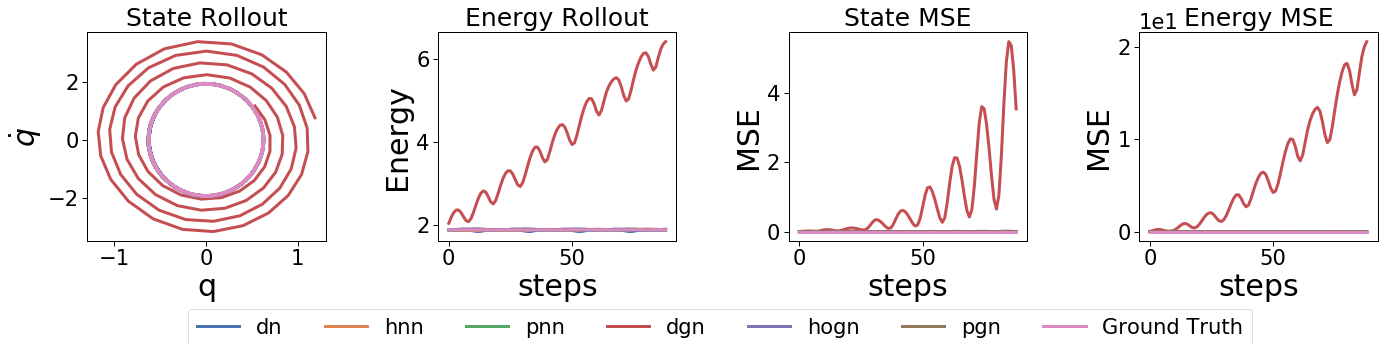

In [19]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=2.4, rc={"font.size":30,"axes.titlesize":25,"axes.labelsize":30,'lines.linewidth':3})
sns.set_palette('deep')
 
datasets = ['pendulum']
dimz = [1]
noise_vec = [False]
root_dir = 'small_expt_21_april/'

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
            fig,axs = plt.subplots(1,4,figsize=(20,5))
            ax = axs.ravel()
            #ax = axs.ravel()
            TEST_POINT = 0
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

                ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,1],label=lab_list[dex],sort=False,ax=ax[0],legend=False)
                #ax[0].scatter(input_batch[:,0],input_batch[:,1])
                ax[0].set_xlabel('q')
                ax[0].set_ylabel(r'$\dot{q}$')


                ax[1].set_title('Energy Rollout')
                sns.lineplot(x=range(len(ham_pred)),y=ham_pred,label=lab_list[dex],ax=ax[1],legend=False)
                ax[1].set_xlabel('steps')
                ax[1].set_ylabel('Energy')



                ax[2].set_title('State MSE')
                l1 =sns.lineplot(x=range(len(yhat)),y=((yhat-true_batch)**2).mean(1),label=lab_list[dex],ax=ax[2],legend=False)
                ax[2].set_xlabel('steps')
                ax[2].set_ylabel('MSE')

                ax[3].set_title('Energy MSE')
                l2 =sns.lineplot(x=range(len(yhat)),y=(ham_pred-ham_true)**2,label=lab_list[dex],ax=ax[3],legend=False)
                ax[3].set_xlabel('steps')
                ax[3].set_ylabel('MSE')

            sns.lineplot(x=true_batch[:,0],y=true_batch[:,1],markers='x',label='Ground Truth',ax=ax[0],sort=False,legend=False)
            sns.lineplot(x=range(len(ham_pred)),y=ham_true,label='Ground Truth',ax=ax[1],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[2],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[3],legend=False)
            ax[2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
            ax[3].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #         ax[2].set_yscale('log')
    #         ax[3].set_yscale('log')

            handles, labels = ax[3].get_legend_handles_labels()
            fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.035),fancybox=True,ncol=7)
            #plt.legend(loc='best')
            plt.tight_layout()
    #         plt.savefig('rk4_mass_spring_noisy.pdf',dpi=2400,bbox_inches='tight')
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card.pdf',dpi=2400,bbox_inches='tight')


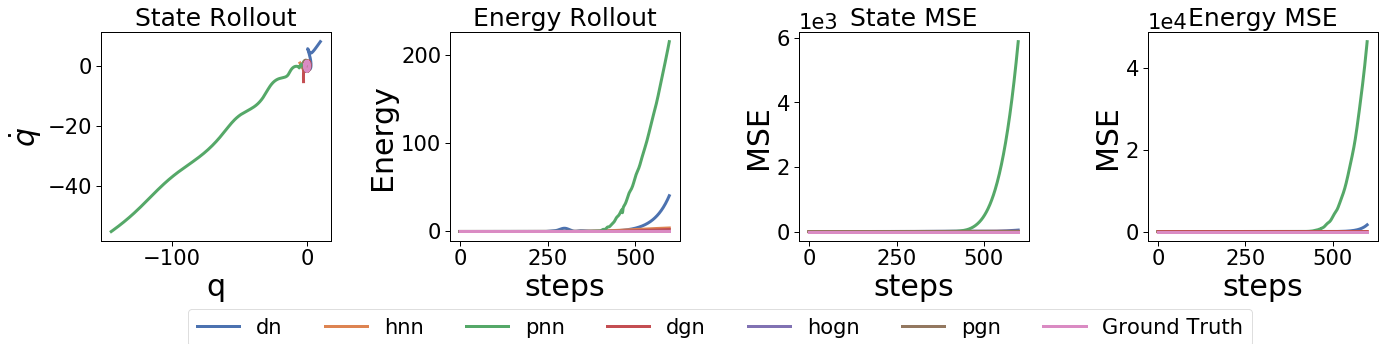

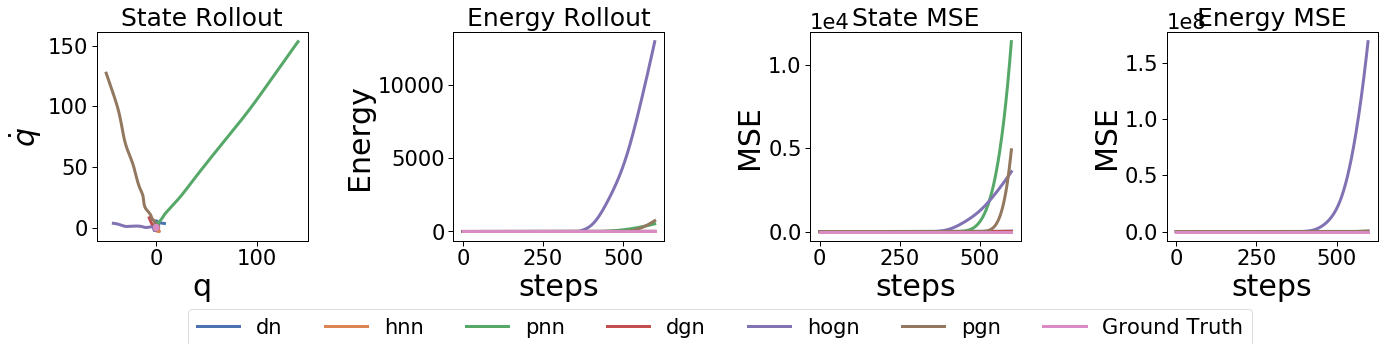

In [20]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=2.4, rc={"font.size":30,"axes.titlesize":25,"axes.labelsize":30,'lines.linewidth':3})
sns.set_palette('deep')
 
datasets = ['n_grav']
dimz = [4]
noise_vec = [False]
root_dir = 'small_expt_21_april/'

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
            fig,axs = plt.subplots(1,4,figsize=(20,5))
            ax = axs.ravel()
            #ax = axs.ravel()
            TEST_POINT = 0
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

                ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,1],label=lab_list[dex],sort=False,ax=ax[0],legend=False)
                #ax[0].scatter(input_batch[:,0],input_batch[:,1])
                ax[0].set_xlabel('q')
                ax[0].set_ylabel(r'$\dot{q}$')


                ax[1].set_title('Energy Rollout')
                sns.lineplot(x=range(len(ham_pred)),y=ham_pred,label=lab_list[dex],ax=ax[1],legend=False)
                ax[1].set_xlabel('steps')
                ax[1].set_ylabel('Energy')



                ax[2].set_title('State MSE')
                l1 =sns.lineplot(x=range(len(yhat)),y=((yhat-true_batch)**2).mean(1),label=lab_list[dex],ax=ax[2],legend=False)
                ax[2].set_xlabel('steps')
                ax[2].set_ylabel('MSE')

                ax[3].set_title('Energy MSE')
                l2 =sns.lineplot(x=range(len(yhat)),y=(ham_pred-ham_true)**2,label=lab_list[dex],ax=ax[3],legend=False)
                ax[3].set_xlabel('steps')
                ax[3].set_ylabel('MSE')

            sns.lineplot(x=true_batch[:,0],y=true_batch[:,1],markers='x',label='Ground Truth',ax=ax[0],sort=False,legend=False)
            sns.lineplot(x=range(len(ham_pred)),y=ham_true,label='Ground Truth',ax=ax[1],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[2],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[3],legend=False)
            ax[2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
            ax[3].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #         ax[2].set_yscale('log')
    #         ax[3].set_yscale('log')

            handles, labels = ax[3].get_legend_handles_labels()
            fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.035),fancybox=True,ncol=7)
            #plt.legend(loc='best')
            plt.tight_layout()
    #         plt.savefig('rk4_mass_spring_noisy.pdf',dpi=2400,bbox_inches='tight')
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card.pdf',dpi=2400,bbox_inches='tight')


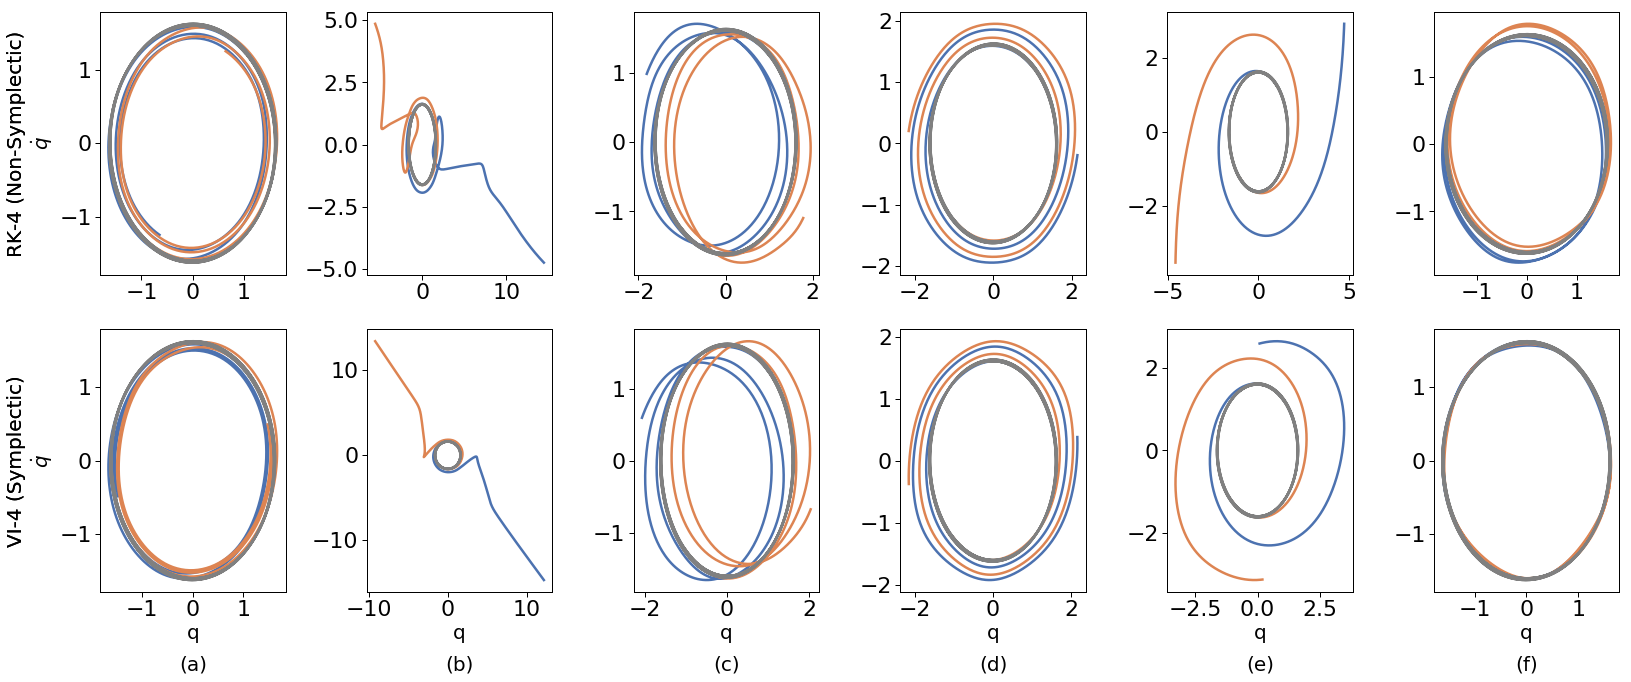

In [26]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=2.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20,'lines.linewidth':2.5})
sns.set_palette('deep')
 
datasets = ['n_grav']
dimz = [4]
noise_vec = [True]
root_dir = 'small_expt_21_april/'

new_label = ['(a)','(b)','(c)','(d)','(e)','(f)']

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
        fig,ax = plt.subplots(2,6,figsize=(23,10))
            
        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            #ax = axs.ravel()
            TEST_POINT = 0
            
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

#                 ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,1],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                sns.lineplot(x=yhat[::,2],y=yhat[::,3],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                
                sns.lineplot(x=true_batch[::,0],y=true_batch[::,1],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                sns.lineplot(x=true_batch[::,2],y=true_batch[::,3],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                
                #ax[0].scatter(input_batch[:,0],input_batch[:,1])
#                 ax[integ_dex,dex].set_title(f'{lab_list[dex]}'.upper())
                if integ_dex !=0:
                    ax[integ_dex,dex].set_xlabel('q')
                    ax[integ_dex,dex].text(0.5,-0.3, f"{new_label[dex]}", size=20, ha="center", transform=ax[integ_dex,dex].transAxes)

                if dex == 0:
                    ax[integ_dex,dex].set_ylabel(r'$\dot{q}$')
            
                    ax[0,0].text(-0.5,0.5, f"RK-4 (Non-Symplectic)", rotation=90, size=20,va='center', transform=ax[0,0].transAxes)
                    ax[1,0].text(-0.5,0.5, f"VI-4 (Symplectic)",rotation=90, size=20,va='center', transform=ax[1,0].transAxes)

#             ax[0,0].set_ylabel(r'$\dot{q}$')

#             handles, labels = ax[3].get_legend_handles_labels()
#             fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.015),fancybox=True,ncol=7)
            #plt.legend(loc='best')
    # Defining custom 'xlim' and 'ylim' values.
#             custom_xlim = (-2, 2)
#             custom_ylim = (-2, 2)

#             # Setting the values for all axes.
#             plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)


           
            plt.tight_layout()
    #         plt.savefig('rk4_mass_spring_noisy.pdf',dpi=2400,bbox_inches='tight')
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card1.pdf',dpi=2400,bbox_inches='tight')


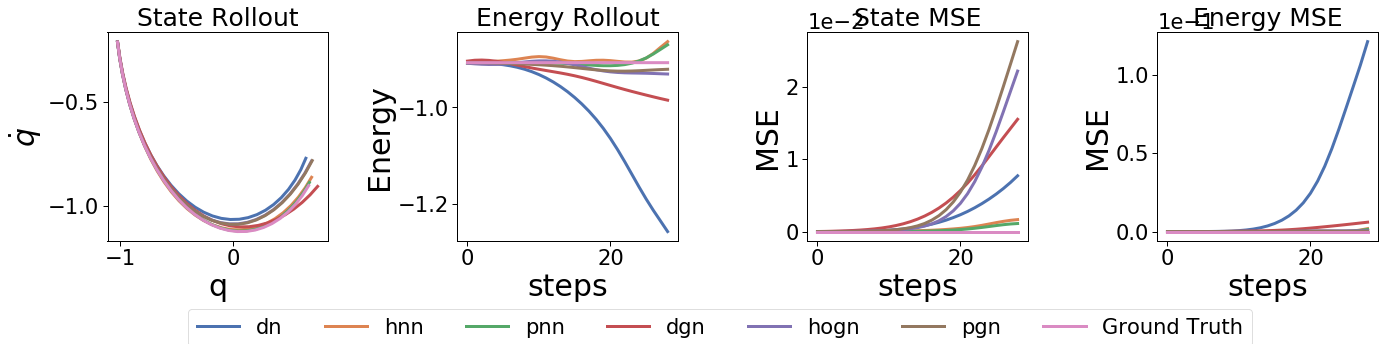

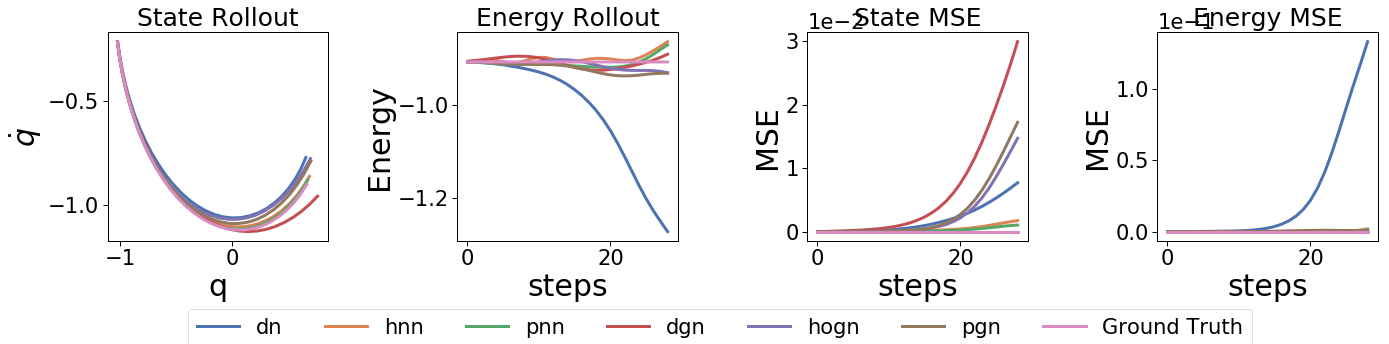

In [22]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=2.4, rc={"font.size":30,"axes.titlesize":25,"axes.labelsize":30,'lines.linewidth':3})
sns.set_palette('deep')
 
datasets = ['three_body']
dimz = [6]
noise_vec = [False]
root_dir = 'small_expt_21_april/'

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
            fig,axs = plt.subplots(1,4,figsize=(20,5))
            ax = axs.ravel()
            #ax = axs.ravel()
            TEST_POINT = 3
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                    
                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                    
                
                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

                yhat = yhat[:int(yhat.shape[0]/2)]
                true_batch = true_batch[:int(true_batch.shape[0]/2)]
                ham_pred = ham_pred[:int(ham_pred.shape[0]/2)]
                ham_true = ham_true[:int(ham_true.shape[0]/2)]
                
                
                ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,1],label=lab_list[dex],sort=False,ax=ax[0],legend=False)
                #ax[0].scatter(input_batch[:,0],input_batch[:,1])
                ax[0].set_xlabel('q')
                ax[0].set_ylabel(r'$\dot{q}$')


                ax[1].set_title('Energy Rollout')
                sns.lineplot(x=range(len(ham_pred)),y=ham_pred,label=lab_list[dex],ax=ax[1],legend=False)
                ax[1].set_xlabel('steps')
                ax[1].set_ylabel('Energy')



                ax[2].set_title('State MSE')
                l1 =sns.lineplot(x=range(len(yhat)),y=((yhat-true_batch)**2).mean(1),label=lab_list[dex],ax=ax[2],legend=False)
                ax[2].set_xlabel('steps')
                ax[2].set_ylabel('MSE')

                ax[3].set_title('Energy MSE')
                l2 =sns.lineplot(x=range(len(yhat)),y=(ham_pred-ham_true)**2,label=lab_list[dex],ax=ax[3],legend=False)
                ax[3].set_xlabel('steps')
                ax[3].set_ylabel('MSE')

            
            sns.lineplot(x=true_batch[:,0],y=true_batch[:,1],markers='x',label='Ground Truth',ax=ax[0],sort=False,legend=False)
            sns.lineplot(x=range(len(ham_pred)),y=ham_true,label='Ground Truth',ax=ax[1],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[2],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[3],legend=False)
            ax[2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
            ax[3].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #         ax[2].set_yscale('log')
    #         ax[3].set_yscale('log')

            handles, labels = ax[3].get_legend_handles_labels()
            fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.035),fancybox=True,ncol=7)
            #plt.legend(loc='best')
            plt.tight_layout()
    #         plt.savefig('rk4_mass_spring_noisy.pdf',dpi=2400,bbox_inches='tight')
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card.pdf',dpi=2400,bbox_inches='tight')


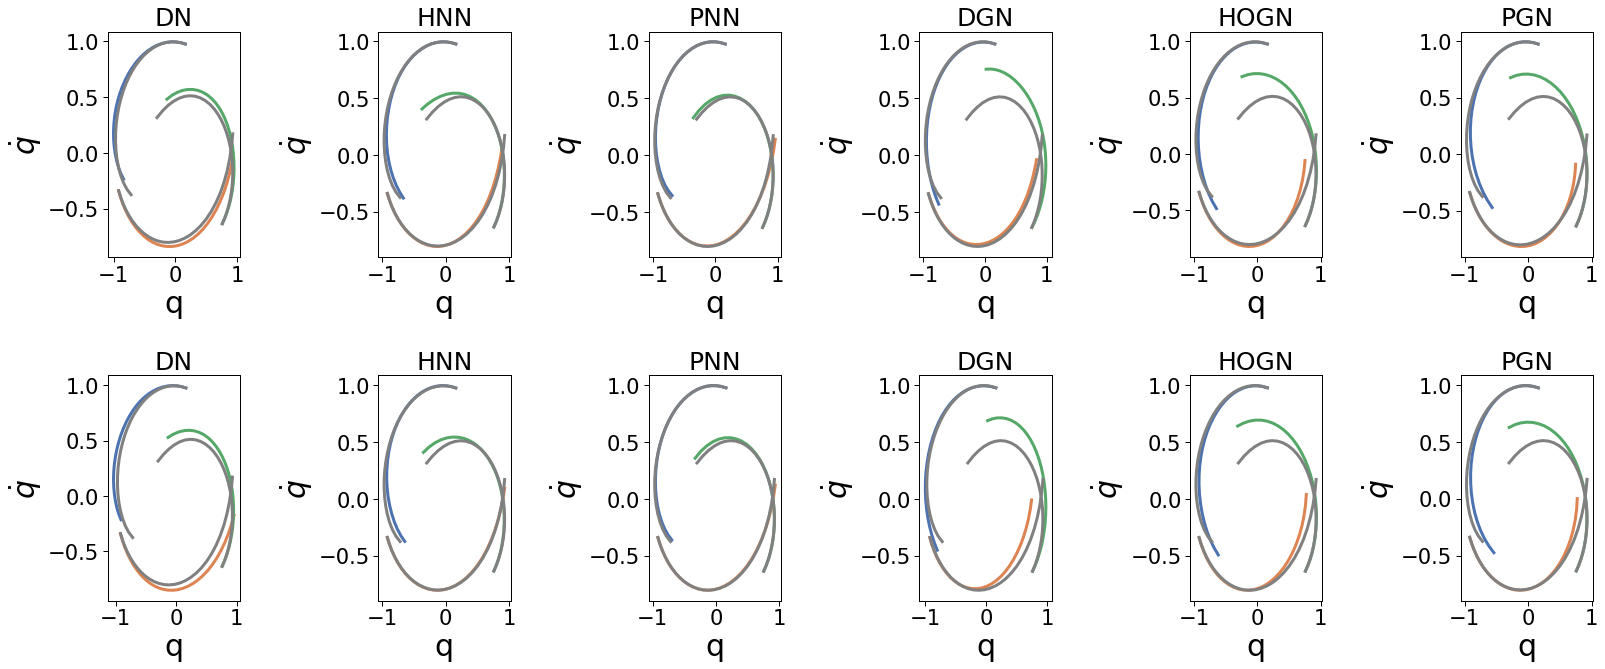

In [23]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=2.4, rc={"font.size":30,"axes.titlesize":25,"axes.labelsize":30,'lines.linewidth':3})
sns.set_palette('deep')
 
datasets = ['three_body']
dimz = [6]
noise_vec = [False]
root_dir = 'small_expt_21_april/'

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
        fig,ax = plt.subplots(2,6,figsize=(23,10))
            
        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            #ax = axs.ravel()
            TEST_POINT = 0
            
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

                yhat = yhat[:int(yhat.shape[0]/2)]
                true_batch = true_batch[:int(true_batch.shape[0]/2)]
                ham_pred = ham_pred[:int(ham_pred.shape[0]/2)]
                ham_true = ham_true[:int(ham_true.shape[0]/2)]
                
#                 ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,1],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                sns.lineplot(x=yhat[::,2],y=yhat[::,3],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                sns.lineplot(x=yhat[::,4],y=yhat[::,5],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                    
            
                sns.lineplot(x=true_batch[::,0],y=true_batch[::,1],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                sns.lineplot(x=true_batch[::,2],y=true_batch[::,3],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                sns.lineplot(x=true_batch[::,4],y=true_batch[::,5],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                
                ax[integ_dex,dex].set_title(f'{lab_list[dex]}'.upper())
                
                ax[integ_dex,dex].set_xlabel('q')
                ax[integ_dex,dex].set_ylabel(r'$\dot{q}$')

            ax[0,0].set_ylabel(r'$\dot{q}$')

#             handles, labels = ax[3].get_legend_handles_labels()
#             fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.015),fancybox=True,ncol=7)
            #plt.legend(loc='best')
            plt.tight_layout()
    #         plt.savefig('rk4_mass_spring_noisy.pdf',dpi=2400,bbox_inches='tight')
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card1.pdf',dpi=2400,bbox_inches='tight')


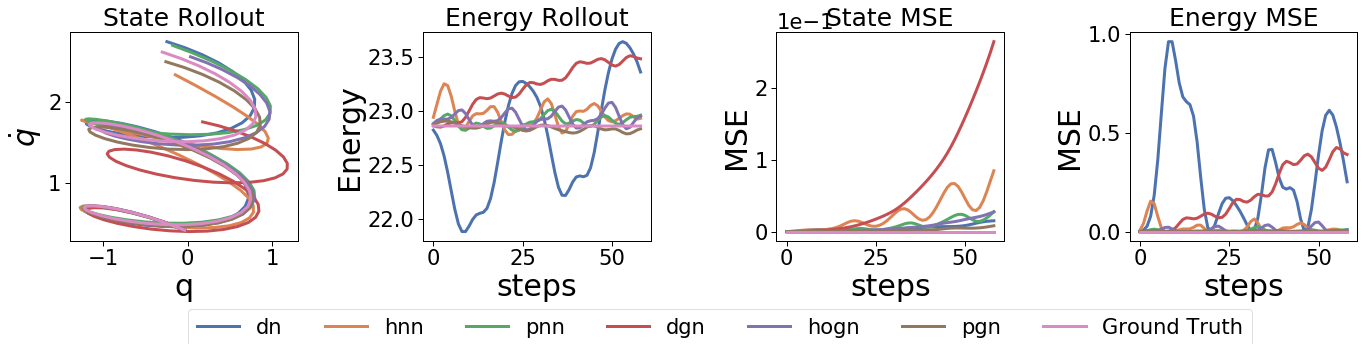

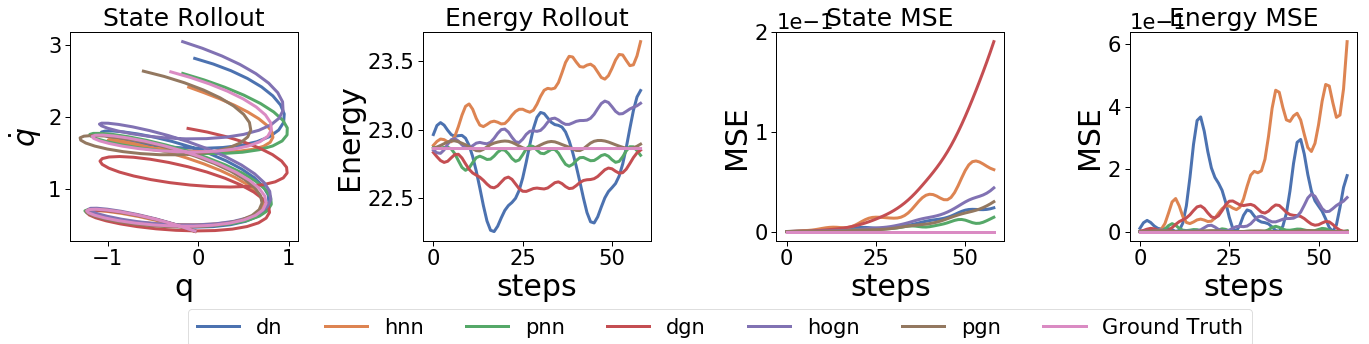

In [24]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=2.4, rc={"font.size":30,"axes.titlesize":25,"axes.labelsize":30,'lines.linewidth':3})
sns.set_palette('deep')
 
datasets = ['n_spring']
dimz = [10]
noise_vec = [False]
root_dir = 'small_expt_21_april/'

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
            fig,axs = plt.subplots(1,4,figsize=(20,5))
            ax = axs.ravel()
            #ax = axs.ravel()
            TEST_POINT = 3
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                    
                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                    
                
                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

                yhat = yhat[:int(yhat.shape[0]/2)]
                true_batch = true_batch[:int(true_batch.shape[0]/2)]
                ham_pred = ham_pred[:int(ham_pred.shape[0]/2)]
                ham_true = ham_true[:int(ham_true.shape[0]/2)]
                
                
                ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,1],label=lab_list[dex],sort=False,ax=ax[0],legend=False)
                #ax[0].scatter(input_batch[:,0],input_batch[:,1])
                ax[0].set_xlabel('q')
                ax[0].set_ylabel(r'$\dot{q}$')


                ax[1].set_title('Energy Rollout')
                sns.lineplot(x=range(len(ham_pred)),y=ham_pred,label=lab_list[dex],ax=ax[1],legend=False)
                ax[1].set_xlabel('steps')
                ax[1].set_ylabel('Energy')



                ax[2].set_title('State MSE')
                l1 =sns.lineplot(x=range(len(yhat)),y=((yhat-true_batch)**2).mean(1),label=lab_list[dex],ax=ax[2],legend=False)
                ax[2].set_xlabel('steps')
                ax[2].set_ylabel('MSE')

                ax[3].set_title('Energy MSE')
                l2 =sns.lineplot(x=range(len(yhat)),y=(ham_pred-ham_true)**2,label=lab_list[dex],ax=ax[3],legend=False)
                ax[3].set_xlabel('steps')
                ax[3].set_ylabel('MSE')

            
            sns.lineplot(x=true_batch[:,0],y=true_batch[:,1],markers='x',label='Ground Truth',ax=ax[0],sort=False,legend=False)
            sns.lineplot(x=range(len(ham_pred)),y=ham_true,label='Ground Truth',ax=ax[1],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[2],legend=False)
            sns.lineplot(x=range(len(yhat)),y=np.zeros(len(yhat)),label='Ground Truth',ax=ax[3],legend=False)
            ax[2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
            ax[3].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #         ax[2].set_yscale('log')
    #         ax[3].set_yscale('log')

            handles, labels = ax[3].get_legend_handles_labels()
            fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.035),fancybox=True,ncol=7)
            #plt.legend(loc='best')
            plt.tight_layout()
    #         plt.savefig('rk4_mass_spring_noisy.pdf',dpi=2400,bbox_inches='tight')
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card.pdf',dpi=2400,bbox_inches='tight')


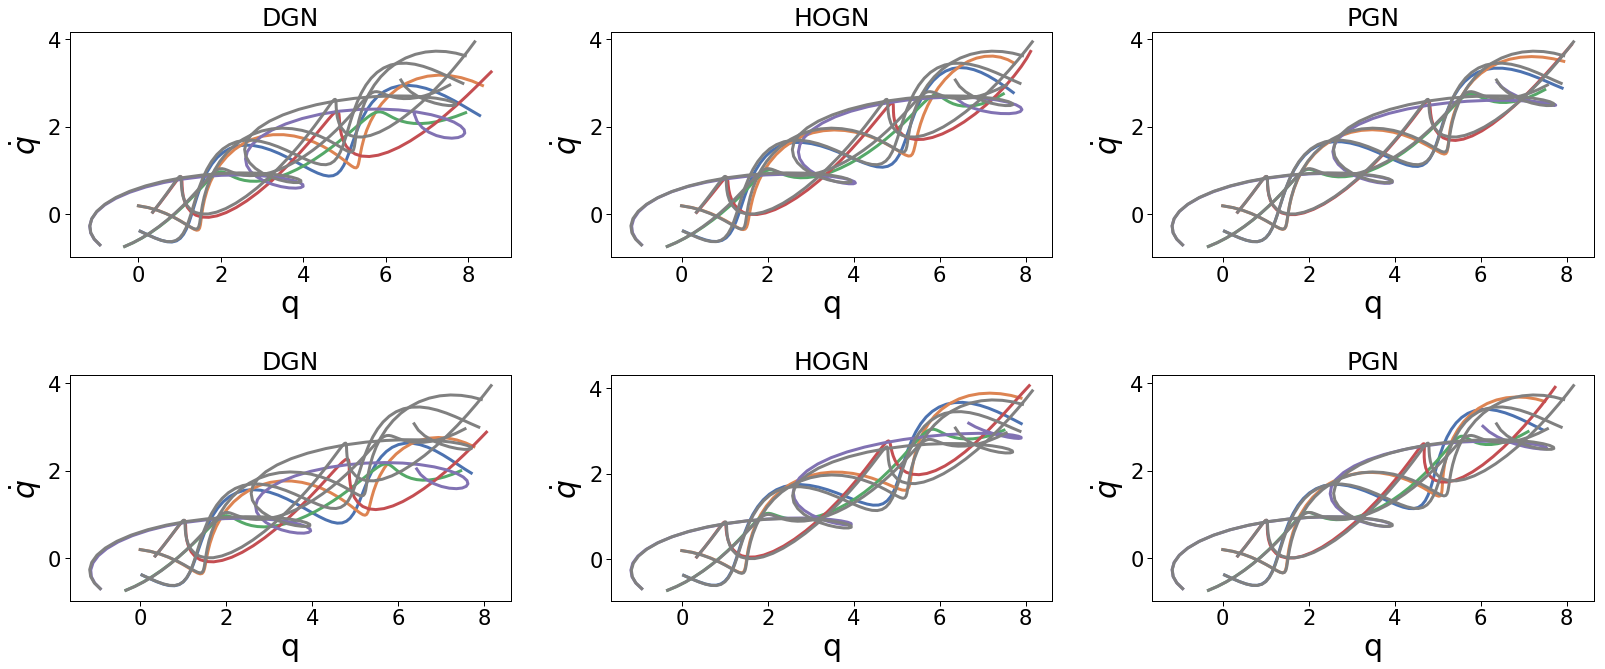

In [25]:
sns.axes_style(style='ticks')
sns.set_context("paper",font_scale=2.4, rc={"font.size":30,"axes.titlesize":25,"axes.labelsize":30,'lines.linewidth':3})
sns.set_palette('deep')
    
datasets = ['n_spring']
dimz = [10]
noise_vec = [False]
root_dir = 'small_expt_21_april/'

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        lab_list = ['dgn','hogn','pgn']
        fig,ax = plt.subplots(2,3,figsize=(23,10))
            
        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            #ax = axs.ravel()
            TEST_POINT = 5
            
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

                yhat = yhat[:int(yhat.shape[0]/2)]
                true_batch = true_batch[:int(true_batch.shape[0]/2)]
                ham_pred = ham_pred[:int(ham_pred.shape[0]/2)]
                ham_true = ham_true[:int(ham_true.shape[0]/2)]
                
#                 ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,1],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                sns.lineplot(x=yhat[::,2],y=yhat[::,3],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                sns.lineplot(x=yhat[::,4],y=yhat[::,5],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                sns.lineplot(x=yhat[::,6],y=yhat[::,7],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                sns.lineplot(x=yhat[::,8],y=yhat[::,9],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                    
            
                sns.lineplot(x=true_batch[::,0],y=true_batch[::,1],dashes=(1),label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                sns.lineplot(x=true_batch[::,2],y=true_batch[::,3],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                sns.lineplot(x=true_batch[::,4],y=true_batch[::,5],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                sns.lineplot(x=true_batch[::,6],y=true_batch[::,7],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                sns.lineplot(x=true_batch[::,8],y=true_batch[::,9],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                
                ax[integ_dex,dex].set_title(f'{lab_list[dex]}'.upper())
                
                ax[integ_dex,dex].set_xlabel('q')
                ax[integ_dex,dex].set_ylabel(r'$\dot{q}$')

            ax[0,0].set_ylabel(r'$\dot{q}$')

#             handles, labels = ax[3].get_legend_handles_labels()
#             fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.015),fancybox=True,ncol=7)
            #plt.legend(loc='best')
            plt.tight_layout()
    #         plt.savefig('rk4_mass_spring_noisy.pdf',dpi=2400,bbox_inches='tight')
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card1.pdf',dpi=2400,bbox_inches='tight')


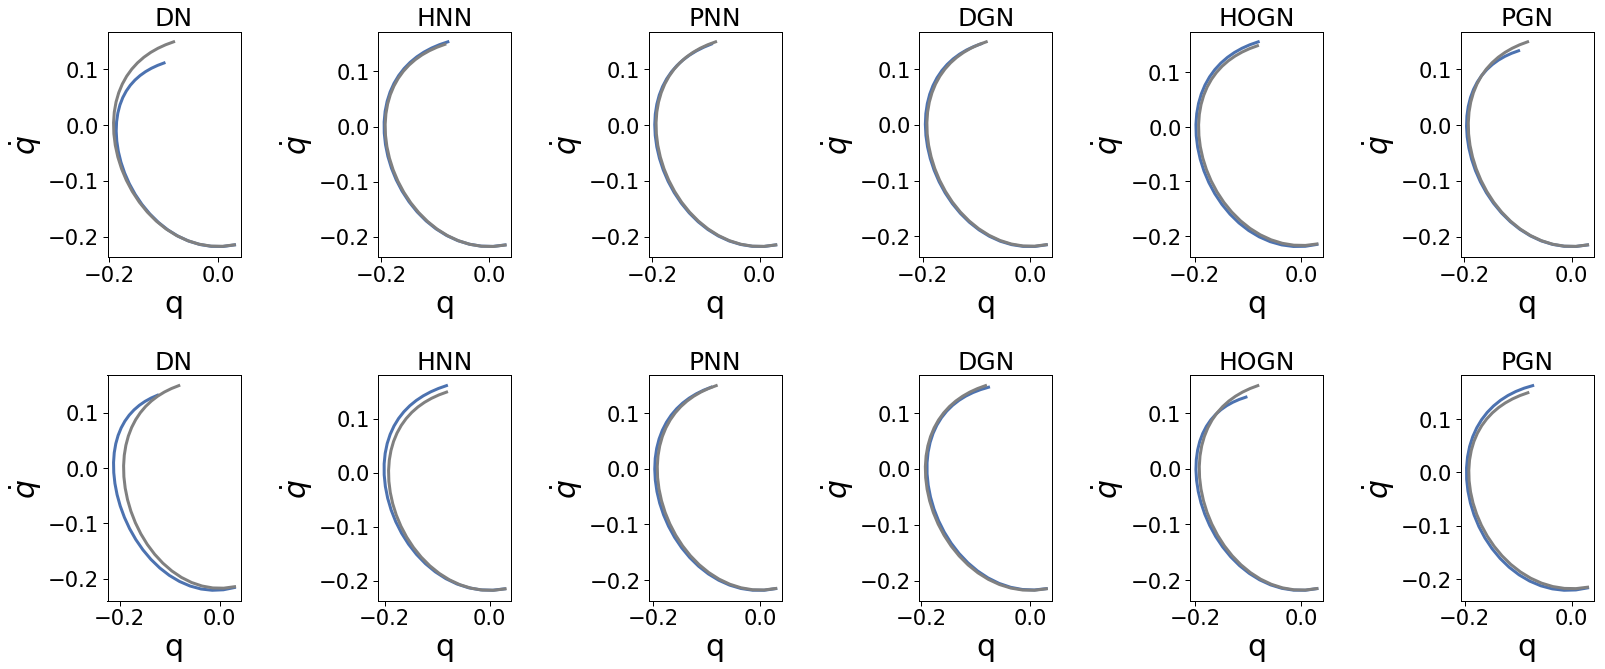

In [26]:

datasets = ['heinon']
dimz = [2]
noise_vec = [False]
root_dir = 'small_expt_21_april/'

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
        fig,ax = plt.subplots(2,6,figsize=(23,10))
            
        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            #ax = axs.ravel()
            TEST_POINT = 0
            
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

#                 yhat = yhat[:int(yhat.shape[0]/2)]
#                 true_batch = true_batch[:int(true_batch.shape[0]/2)]
#                 ham_pred = ham_pred[:int(ham_pred.shape[0]/2)]
#                 ham_true = ham_true[:int(ham_true.shape[0]/2)]
                
#                 ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,2],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                    
            
                sns.lineplot(x=true_batch[::,0],y=true_batch[::,2],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                
                ax[integ_dex,dex].set_title(f'{lab_list[dex]}'.upper())
                
                ax[integ_dex,dex].set_xlabel('q')
                ax[integ_dex,dex].set_ylabel(r'$\dot{q}$')

            ax[0,0].set_ylabel(r'$\dot{q}$')

#             handles, labels = ax[3].get_legend_handles_labels()
#             fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.015),fancybox=True,ncol=7)
            #plt.legend(loc='best')
            plt.tight_layout()
    #         plt.savefig('rk4_mass_spring_noisy.pdf',dpi=2400,bbox_inches='tight')
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card1.pdf',dpi=2400,bbox_inches='tight')


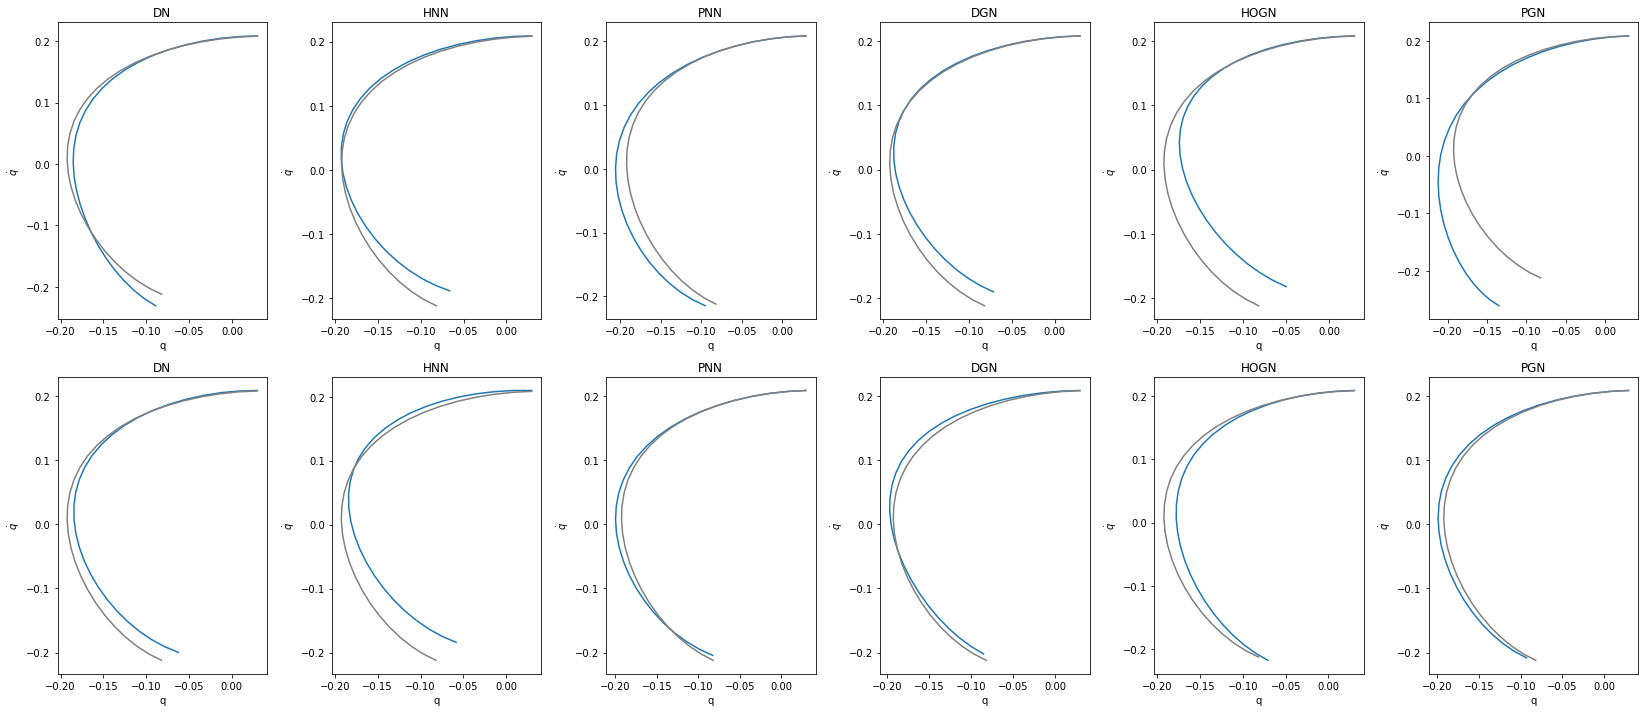

In [2]:
noise_vec = [True]
datasets = ['heinon']
dimz = [2]
# noise_vec = [False]
# root_dir = 'largest_expt/'

for dex_data,dataset_name in enumerate(datasets):
    hamiltonian_fn = get_hamiltonian(dataset_name)
    for noisy in noise_vec:
        if noisy:
            with open(f"{root_dir}/{dataset_name}_state_collector_noisy.pickle", "rb") as output_file:
                file = pickle.load(output_file)
        else:
            with open(f"{root_dir}/{dataset_name}_state_collector.pickle", "rb") as output_file:
                file = pickle.load(output_file)

        lab_list = ['dn','hnn','pnn','dgn','hogn','pgn']
        fig,ax = plt.subplots(2,6,figsize=(23,10))
            
        for integ_dex, integ_type in enumerate(['rk4','vi4']):
            #ax = axs.ravel()
            TEST_POINT = 0
            
            for dex in range(len(lab_list)):

                true_batch_tmp = file[f'gt_{TEST_POINT}']
    #             print(true_batch_tmp.shape)
                qs = true_batch_tmp[:,:int(true_batch_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                ps = true_batch_tmp[:,int(true_batch_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                true_batch = np.concatenate([qs,ps],1)

                if 'g' not in lab_list[dex]:
                    yhat = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')
                else:
                    yhat_tmp = file[f'{lab_list[dex]}_{integ_type}_{TEST_POINT}']
    #                 print(yhat_tmp.shape)
                    qs = yhat_tmp[:,:int(yhat_tmp.shape[1]/2)].reshape(-1,dimz[dex_data])
                    ps = yhat_tmp[:,int(yhat_tmp.shape[1]/2):].reshape(-1,dimz[dex_data])
                    yhat = np.concatenate([qs,ps],1)
                    K_pred,U_pred = hamiltonian_fn(yhat,'classic')

                K_true,U_true = hamiltonian_fn(true_batch,'classic')

                ham_pred = K_pred + U_pred
                ham_true = K_true + U_true

#                 ax[0].set_title('State Rollout')
                sns.lineplot(x=yhat[::,0],y=yhat[::,1],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
#                 sns.lineplot(x=yhat[::,2],y=yhat[::,3],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False)
                
                sns.lineplot(x=true_batch[::,0],y=true_batch[::,1],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
#                 sns.lineplot(x=true_batch[::,2],y=true_batch[::,3],label=lab_list[dex],sort=False,ax=ax[integ_dex,dex],legend=False,linestyle='--',color='grey')
                
                #ax[0].scatter(input_batch[:,0],input_batch[:,1])
                ax[integ_dex,dex].set_title(f'{lab_list[dex]}'.upper())
                
                ax[integ_dex,dex].set_xlabel('q')
                ax[integ_dex,dex].set_ylabel(r'$\dot{q}$')

            ax[0,0].set_ylabel(r'$\dot{q}$')

#             handles, labels = ax[3].get_legend_handles_labels()
#             fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, -0.015),fancybox=True,ncol=7)
            #plt.legend(loc='best')
            plt.tight_layout()
    #         plt.savefig('rk4_mass_spring_noisy.pdf',dpi=2400,bbox_inches='tight')
            plt.savefig(f'{dataset_name}_{integ_type}_{noisy}_card1.pdf',dpi=2400,bbox_inches='tight')


In [ ]:
# fig,ax = plt.subplots(2,1,sharex=True,figsize=(7,7))
#         if noisy:
#             state_error = np.load(f'{dataset_name}_state_error_noisy.npy')
#             energy_error = np.load(f'{dataset_name}_energy_error_noisy.npy')
#         else:
#             state_error = np.load(f'{dataset_name}_state_error.npy')
#             energy_error = np.load(f'{dataset_name}_energy_error.npy')
#         xvals = np.arange(6)
#         wdt = 0.45
#         fig.suptitle(labels[data_index])
#         ax[0].set_ylabel('State MSE')
#         ax[1].set_ylabel('Energy MSE')
#         ax[0].bar(xvals-0.23,gmean(state_error[0,:,:],1),width=wdt,label='rk4',color='royalblue',alpha=0.8)
#         ax[0].bar(xvals+0.23,gmean(state_error[1,:,:],1),width=wdt,label='vi4',color='darkorange',alpha=0.8)
#         ax[1].bar(xvals-0.23,gmean(energy_error[0,:,:],1),width=wdt,label='rk4',color='royalblue',alpha=0.8)
#         ax[1].bar(xvals+0.23,gmean(energy_error[1,:,:],1),width=wdt,label='vi4',color='darkorange',alpha=0.8)
#         ax[1].set_xticks(xvals)
#         ax[1].set_xticklabels(label_list)
#         ax[0].set_yscale('log')
#         ax[1].set_yscale('log')
# #         plt.tight_layout()
#         plt.savefig(f'{dataset_name}_geom_tanh_{noisy}.pdf',bbox_inches='tight')